In [1]:
import numpy as np

class Perceptron:
  def __init__(self, epochs : int, learning_rate : float, input_size : int):
    self.epochs = epochs
    self.__learning_rate = learning_rate
    self.__weights = np.random.rand(input_size)
    self.__bias = np.random.rand()
    self.accuracy = []
  def activation(self,  result : float):
    return 1 if result > 0 else 0

  def fit(self, X_train, y_train):
    for epoch in range(self.epochs):
      acertos = 0
      print(f"Época {epoch + 1}/{self.epochs}")
      for i in range(len(X_train)):
        X_i = X_train[i]
        y_i = y_train[i]

        result = np.dot(X_i, self.__weights) + self.__bias

        predict = self.activation(result)

        error = y_i - predict

        self.__weights += self.__learning_rate * error * X_i
        self.__bias += self.__learning_rate * error

        acertos += int(predict == y_i)

      self.accuracy.append(acertos / len(X_train))
      print(f"Acurácia: {self.accuracy[epoch] * 100:.2f}%\n")

    self.accuracy = np.array(self.accuracy)

  def predict(self, samples):
    results = np.dot(samples, self.__weights) + self.__bias
    return np.where(results > 0, 1, 0)


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()

X, y = iris.data, iris.target

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
y_setosa = np.where(y == 0, 1, 0)
y_virginica = np.where(y == 2, 1, 0)

/home/israel/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
#perceptron que identifica se é setosa

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y_setosa, test_size=0.2, random_state = 0)
model1 = Perceptron(5, learning_rate=0.1, input_size=4)

model1.fit(X_train1, y_train1)

Época 1/5
Acurácia: 93.33%

Época 2/5
Acurácia: 100.00%

Época 3/5
Acurácia: 100.00%

Época 4/5
Acurácia: 100.00%

Época 5/5
Acurácia: 100.00%



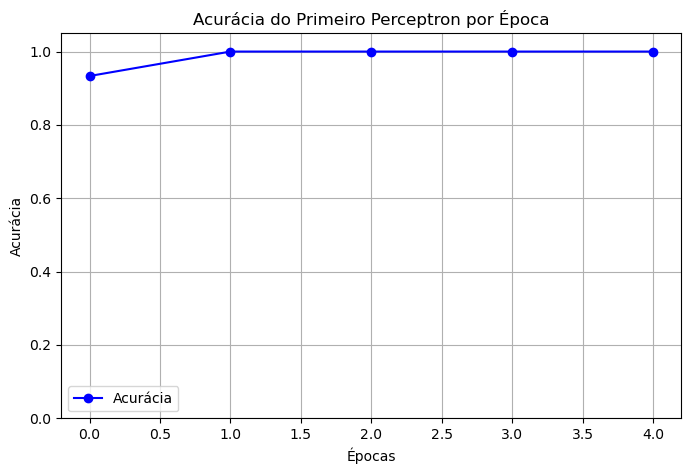

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.array(range(model1.epochs)), model1.accuracy, marker='o', linestyle='-', color='blue', label='Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia do Primeiro Perceptron por Época')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)  # escala de 0 a 1 (ou 105% se quiser)
plt.show()


In [5]:
#perceptron que identifica se é virginica

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y_virginica, test_size=0.2, random_state = 0)
model2 = Perceptron(100, learning_rate=0.1, input_size=4)

model2.fit(X_train2, y_train2)

Época 1/100
Acurácia: 90.00%

Época 2/100
Acurácia: 93.33%

Época 3/100
Acurácia: 91.67%

Época 4/100
Acurácia: 95.83%

Época 5/100
Acurácia: 92.50%

Época 6/100
Acurácia: 96.67%

Época 7/100
Acurácia: 93.33%

Época 8/100
Acurácia: 96.67%

Época 9/100
Acurácia: 96.67%

Época 10/100
Acurácia: 96.67%

Época 11/100
Acurácia: 96.67%

Época 12/100
Acurácia: 96.67%

Época 13/100
Acurácia: 96.67%

Época 14/100
Acurácia: 93.33%

Época 15/100
Acurácia: 95.83%

Época 16/100
Acurácia: 95.00%

Época 17/100
Acurácia: 95.00%

Época 18/100
Acurácia: 95.00%

Época 19/100
Acurácia: 96.67%

Época 20/100
Acurácia: 96.67%

Época 21/100
Acurácia: 95.83%

Época 22/100
Acurácia: 95.00%

Época 23/100
Acurácia: 95.00%

Época 24/100
Acurácia: 96.67%

Época 25/100
Acurácia: 96.67%

Época 26/100
Acurácia: 95.00%

Época 27/100
Acurácia: 95.00%

Época 28/100
Acurácia: 96.67%

Época 29/100
Acurácia: 96.67%

Época 30/100
Acurácia: 96.67%

Época 31/100
Acurácia: 96.67%

Época 32/100
Acurácia: 96.67%

Época 33/100
Acur

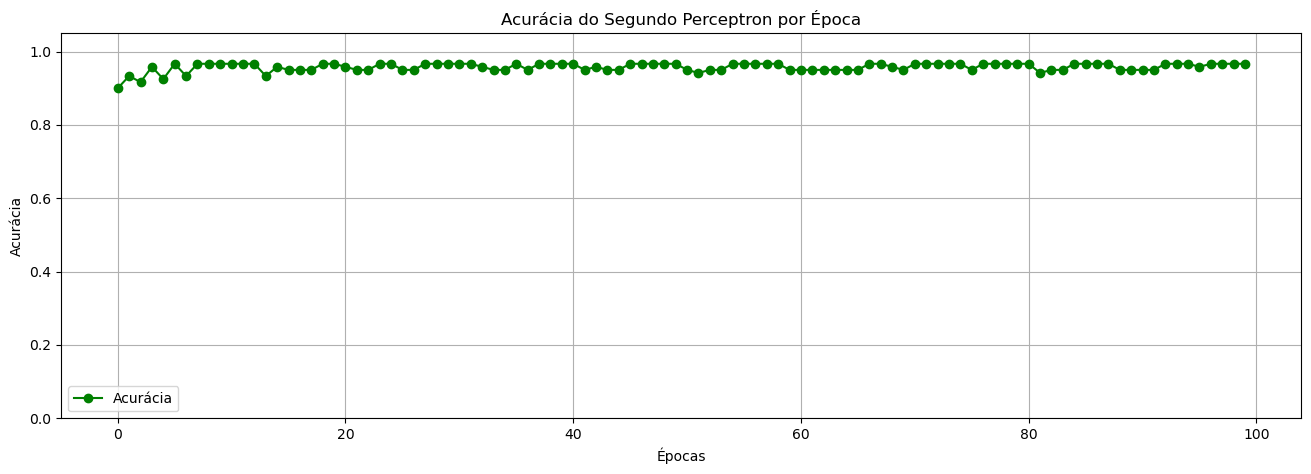

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))
plt.plot(np.array(range(model2.epochs)), model2.accuracy, marker='o', linestyle='-', color='green', label='Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia do Segundo Perceptron por Época')
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)  # escala de 0 a 1 (ou 105% se quiser)
plt.show()


In [8]:
#testando o primeiro perceptron

from sklearn.metrics import classification_report

y_pred1 = model1.predict(X_test1)
resultados1 = classification_report(y_test1, y_pred1)

print(resultados1)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [192]:
#testando o segundo perceptron

from sklearn.metrics import classification_report

y_pred2 = model2.predict(X_test2)
resultados3 = classification_report(y_test2, y_pred2)

print(resultados3)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.92      0.94        30
weighted avg       0.97      0.97      0.97        30



In [205]:
def final_predict(sample : np.ndarray):
  predict1 = model1.predict(sample)
  predict2 = model2.predict(sample)


  sample_predict = np.full_like(a=sample.flatten(), fill_value=-1)

  sample_predict = np.where(predict1 == 1, 0, 1)
  sample_predict[predict2 == 1] = 2

  return sample_predict


y_test = np.where(y_test1 == 1, 0, 1)
y_test[y_test2 == 1] = 2

y_pred = final_predict(X_test1)

resultados = classification_report(y_test, y_pred)

print(resultados)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

